# Stat - Problem Set 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("dark")

## Problem 5

In [2]:
M = 500
N = 10000
nLs = [5, 10, 100, 500, 1000, 10000]

In [3]:
def sampleFromtDist(M = 500, N = 10000, niu = 100):
    """
    M - int, # of random samples
    N - int, length of each sample
    niu - int, t_niu distribution, default at 100
    
    rtn - np.array (M, N)
    """
    rtn = []
    
    for _ in range(M):
        rtn.append(
            np.random.standard_t(
                niu, 
                size = N
            )
        )
    
    rtn = np.array(rtn)
    assert(rtn.shape == (M, N))
    return rtn

In [4]:
def computeSampleMeanSingle(sample, nLs = [5, 10, 100, 500, 1000, 10000]):
    """
    sample - np.array, single sample
    nLs - list of int, compute mean of first n sample
    
    rtn - np.array (1, len(nLs))
    """
    rtn = []
    length = sample.shape[0]
    
    for n in nLs:
        if n <= length:
            rtn.append(
                np.mean(
                    sample[:n]
                )
            )
        else:
            print("[ERR:] n {} is larger than the sample size {}".format(
                n,
                length
            ))
    
    rtn = np.array(rtn)
    assert( rtn.shape[0] == len(nLs))
    return rtn

In [5]:
def computeSampleMeanMultiple(sample, nLs = [5, 10, 100, 500, 1000, 10000]):
    """
    sample - np.array, sample
    nLs - list of int, compute mean of first n sample
    
    rtn - np.array (M, len(nLs))
    """
    M = sample.shape[0]
    rtn = []
    
    for m in range(M):
        rtn.append(
            computeSampleMeanSingle(
                sample = sample[m],
                nLs = nLs
            )
        )
        
    rtn = np.array(rtn)
    assert (rtn.shape == (M, len(nLs)))
    return rtn

In [6]:
def computeSampleMeanStat(sampleMean):
    """
    sampleMeanN - np.array
    
    rtn - dict {mean:, std:, var:}
    """
    M, n = sampleMean.shape
    rtn = {}
    
    mean = np.mean(sampleMean, axis = 0)
    std = np.std(sampleMean, axis = 0)
    var = np.var(sampleMean, axis = 0)
    
    rtn = {
        "mean": mean,
        "std": std,
        "var": var
    }
    return rtn

#### Question (a) - (c)

In [7]:
### Question (a), sample from t_100
sample = sampleFromtDist()
### Question (b), compute sample mean
# computeSampleMeanSingle(sample[0])
sampleMean = computeSampleMeanMultiple(sample)
### Question (c), compute mean, std, var for sample mean
sampleMeanStatDict = computeSampleMeanStat(sampleMean)
sampleMeanStatDict

{'mean': array([0.01643002, 0.01158092, 0.00056643, 0.00207954, 0.00158264,
        0.00027044]),
 'std': array([0.43982442, 0.32648308, 0.10223209, 0.0454418 , 0.0328239 ,
        0.00988473]),
 'var': array([1.93445517e-01, 1.06591199e-01, 1.04514011e-02, 2.06495687e-03,
        1.07740822e-03, 9.77078428e-05])}

#### Question (d)

In [8]:
sampleMeanPlot = sampleMean.T

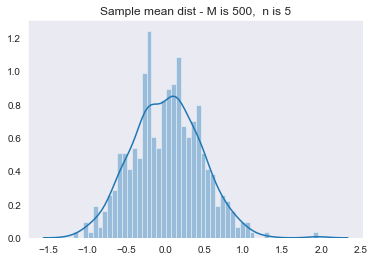

In [9]:
n, M = sampleMeanPlot.shape

sns.distplot(
    a = sampleMeanPlot[0],
    kde = True,
    rug = False,
    hist = True,
    bins = 50
)
plt.title("Sample mean dist - M is {},  n is {}".format(M, nLs[0]));

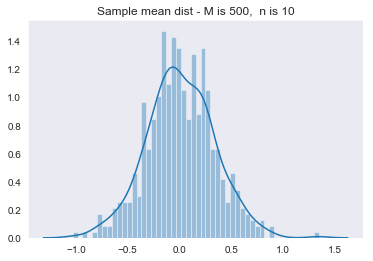

In [10]:
sns.distplot(
    a = sampleMeanPlot[1],
    kde = True,
    rug = False,
    hist = True,
    bins = 50
)
plt.title("Sample mean dist - M is {},  n is {}".format(M, nLs[1]));

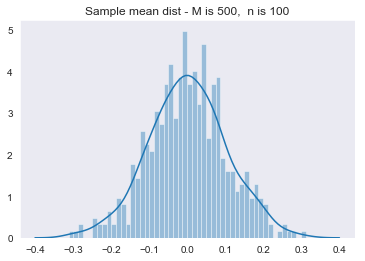

In [11]:
sns.distplot(
    a = sampleMeanPlot[2],
    kde = True,
    rug = False,
    hist = True,
    bins = 50
)
plt.title("Sample mean dist - M is {},  n is {}".format(M, nLs[2]));

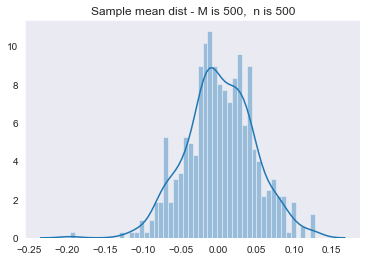

In [12]:
sns.distplot(
    a = sampleMeanPlot[3],
    kde = True,
    rug = False,
    hist = True,
    bins = 50
)
plt.title("Sample mean dist - M is {},  n is {}".format(M, nLs[3]));

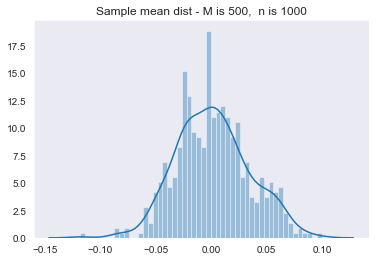

In [13]:
sns.distplot(
    a = sampleMeanPlot[4],
    kde = True,
    rug = False,
    hist = True,
    bins = 50
)
plt.title("Sample mean dist - M is {},  n is {}".format(M, nLs[4]));

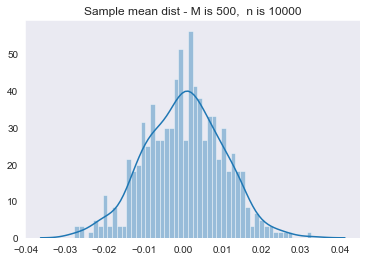

In [14]:
sns.distplot(
    a = sampleMeanPlot[5],
    kde = True,
    rug = False,
    hist = True,
    bins = 50
)
plt.title("Sample mean dist - M is {},  n is {}".format(M, nLs[5]));

#### Question (e)

- LLN:
    LLN implies that the mean of sample mean $\rightarrow 0$ as $n \rightarrow \infty$ 
- CLT:
    CLT implies that the dist of sample mean tends to, in distribution, normal distribution as $n \rightarrow \infty$ 

#### Question (f)

In [15]:
def experimentSingle(niu, M = 500, N = 10000, nLs =  [5, 10, 100, 500, 1000, 10000]):
#     sample = sampleFromtDist(M, N, niu)
#     sampleMean = computeSampleMeanMultiple(sample)
#     sampleMeanStatDict = computeSampleMeanStat(sampleMean)
    return computeSampleMeanStat(
        sampleMean = computeSampleMeanMultiple(
            sample = sampleFromtDist(
                M = M, 
                N = N, 
                niu = niu
            ),
            nLs = nLs
        )
    )

In [16]:
niuLs = [10, 5, 2, 1, 0.5]

for niu in niuLs:
    statDict = experimentSingle(niu, M, N, nLs)
    print("niu is {}, stats are {}".format(niu, statDict))


niu is 10, stats are {'mean': array([ 0.04395236,  0.00937579, -0.00330559,  0.00391393,  0.00163499,
        0.00040964]), 'std': array([0.50342661, 0.35329065, 0.10630545, 0.05011354, 0.03705102,
       0.01114174]), 'var': array([2.53438350e-01, 1.24814282e-01, 1.13008484e-02, 2.51136645e-03,
       1.37277784e-03, 1.24138383e-04])}
niu is 5, stats are {'mean': array([ 0.00018323,  0.00197095,  0.00108104,  0.00124236,  0.00118946,
       -0.00013175]), 'std': array([0.53262178, 0.39748313, 0.13104533, 0.05522858, 0.04076498,
       0.01233782]), 'var': array([2.83685956e-01, 1.57992842e-01, 1.71728773e-02, 3.05019604e-03,
       1.66178381e-03, 1.52221834e-04])}
niu is 2, stats are {'mean': array([-0.07079034, -0.02948851,  0.00234231, -0.01497252, -0.0011929 ,
        0.00063155]), 'std': array([1.61724467, 1.01585856, 0.35096595, 0.15276665, 0.11148434,
       0.0667593 ]), 'var': array([2.61548033, 1.03196861, 0.1231771 , 0.02333765, 0.01242876,
       0.0044568 ])}
niu is 1, st

#### Question (g)
- As niu $\rightarrow \infty$, the limiting behavior of sample mean converge to normal distribution quicker. 

## Problem 6

#### Question (a) - change state 1, 2 to state 0, 1 for sake of simplification

In [17]:
stateTranProb = [
    [0.75, 0.25],
    [0.6, 0.4]
]
initState = 0
steps = 1000
path = [initState]

curState = initState
for step in range(steps):
    curState = 0 if np.random.random() < stateTranProb[curState][0] else 1
    path.append(curState)
    if step % 100 == 0:
        print("at step {}, current state is {}".format(step, curState))
# print(path)

at step 0, current state is 0
at step 100, current state is 0
at step 200, current state is 1
at step 300, current state is 1
at step 400, current state is 0
at step 500, current state is 1
at step 600, current state is 0
at step 700, current state is 0
at step 800, current state is 0
at step 900, current state is 1


#### Question (b)

C:\Python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


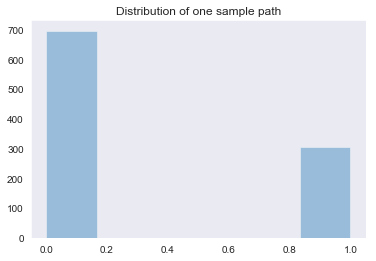

In [18]:
sns.distplot(
    a = path,
    kde = False,
    rug = False,
    hist = True
)
plt.title("Distribution of one sample path");

In [19]:
sampleProb = [
    1 - sum(path) / len(path), 
    sum(path) / len(path)
]

stationaryDist = [
    12 / 17,
    5 / 17
]
print(
    "sample dist is {}\n".format(sampleProb),
    "stationary dist is {}\n".format(stationaryDist)
)

sample dist is [0.6953046953046953, 0.3046953046953047]
 stationary dist is [0.7058823529411765, 0.29411764705882354]

